# Model Test #1:
* Did not remove or impute negative values from dataset
* Did not balance classes

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import io, s3fs, json
pd.set_option('display.max_columns', None)
print('Program run at', dt.now())

Program run at 2021-06-02 20:02:04.206769


In [14]:
est = pd.read_csv('s3://bleeding-hearts/workingdata/merge_est.csv')
pct = pd.read_csv('s3://bleeding-hearts/workingdata/merge_pct.csv')
est.info()
pct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Columns: 148 entries, Unnamed: 0 to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(1), int64(143), object(4)
memory usage: 20.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Columns: 148 entries, Unnamed: 0 to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(102), int64(42), object(4)
memory usage: 20.6+ MB


In [15]:
#column names are the same in est and pct
cols=list(est)
cat_cols=cols[-8:-4]
num_cols=cols[-4:]
print(cat_cols,'\n\n',num_cols)

['Child Opportunity Levels, education domain, nationally- normed', 'Child Opportunity Levels, health and environment domain, nationally-normed', 'Child Opportunity Levels, social and economic domain, nationally-normed', 'Child Opportunity Levels, overall COI, nationally-normed'] 

 ['Child Opportunity Scores, education domain, nationally- normed', 'Child Opportunity Scores, health and environment domain, nationally-normed', 'Child Opportunity Scores, social and economic domain, nationally-normed', 'Child Opportunity Scores, overall COI, nationally-normed']


In [16]:
for i in [est,pct]:
    #when we read in the data, it brings in a new col, Unnamed:0; dropping it.
    i.drop(columns=['Unnamed: 0'],inplace=True)
    i.drop(columns=cat_cols,inplace=True)

In [35]:
#make label lists
num_labels = est.columns
num_labels

Index(['EMPLOYMENT STATUS_Population 16 years and over',
       'EMPLOYMENT STATUS_Population 16 years and over_In labor force',
       'EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force',
       'EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Employed',
       'EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Unemployed',
       'EMPLOYMENT STATUS_Population 16 years and over_In labor force_Armed Forces',
       'EMPLOYMENT STATUS_Population 16 years and over_Not in labor force',
       'EMPLOYMENT STATUS_Civilian labor force',
       'EMPLOYMENT STATUS_Civilian labor force_Unemployment Rate',
       'EMPLOYMENT STATUS_Females 16 years and over',
       ...
       'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_18 to 64 years',
       'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_65 ye

In [29]:
from pandas import plotting
import matplotlib.pyplot as plt

# Ignore warnings from scikit-learn to make this notebook a bit nicer
import warnings
warnings.simplefilter('ignore')

# Models may be implemented as pipelines
from sklearn.pipeline import Pipeline

# Used to divide our dataseets into train/test splits
# Data will be randomly shuffled so running this notebook multiple times may lead to different results
from sklearn.model_selection import train_test_split as tts

# Visual analysis of model performance
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import classification_report
from yellowbrick.regressor import prediction_error, ResidualsPlot

# Set the default figure size for matplotlib
plt.rcParams['figure.figsize'] = (20, 60)


from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
#Pipeline toolset
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

#Model toolset
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge

#Evaluation toolset
from sklearn.model_selection import StratifiedKFold, cross_val_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances

from sklearn.model_selection import train_test_split as tts

In [31]:
viz

dict_keys(['absolute', 'ax', 'colormap', 'colors', 'estimator', 'is_fitted', 'labels', 'relative', 'stack', 'topn', 'xlabel']) 


dict_keys(['absolute', 'ax', 'colormap', 'colors', 'estimator', 'is_fitted', 'labels', 'relative', 'stack', 'topn', 'xlabel']) 




FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 142 Features using RandomForestClassifier'}, xlabel='relative importance'>,
                   estimator=RandomForestClassifier(n_estimators=10))

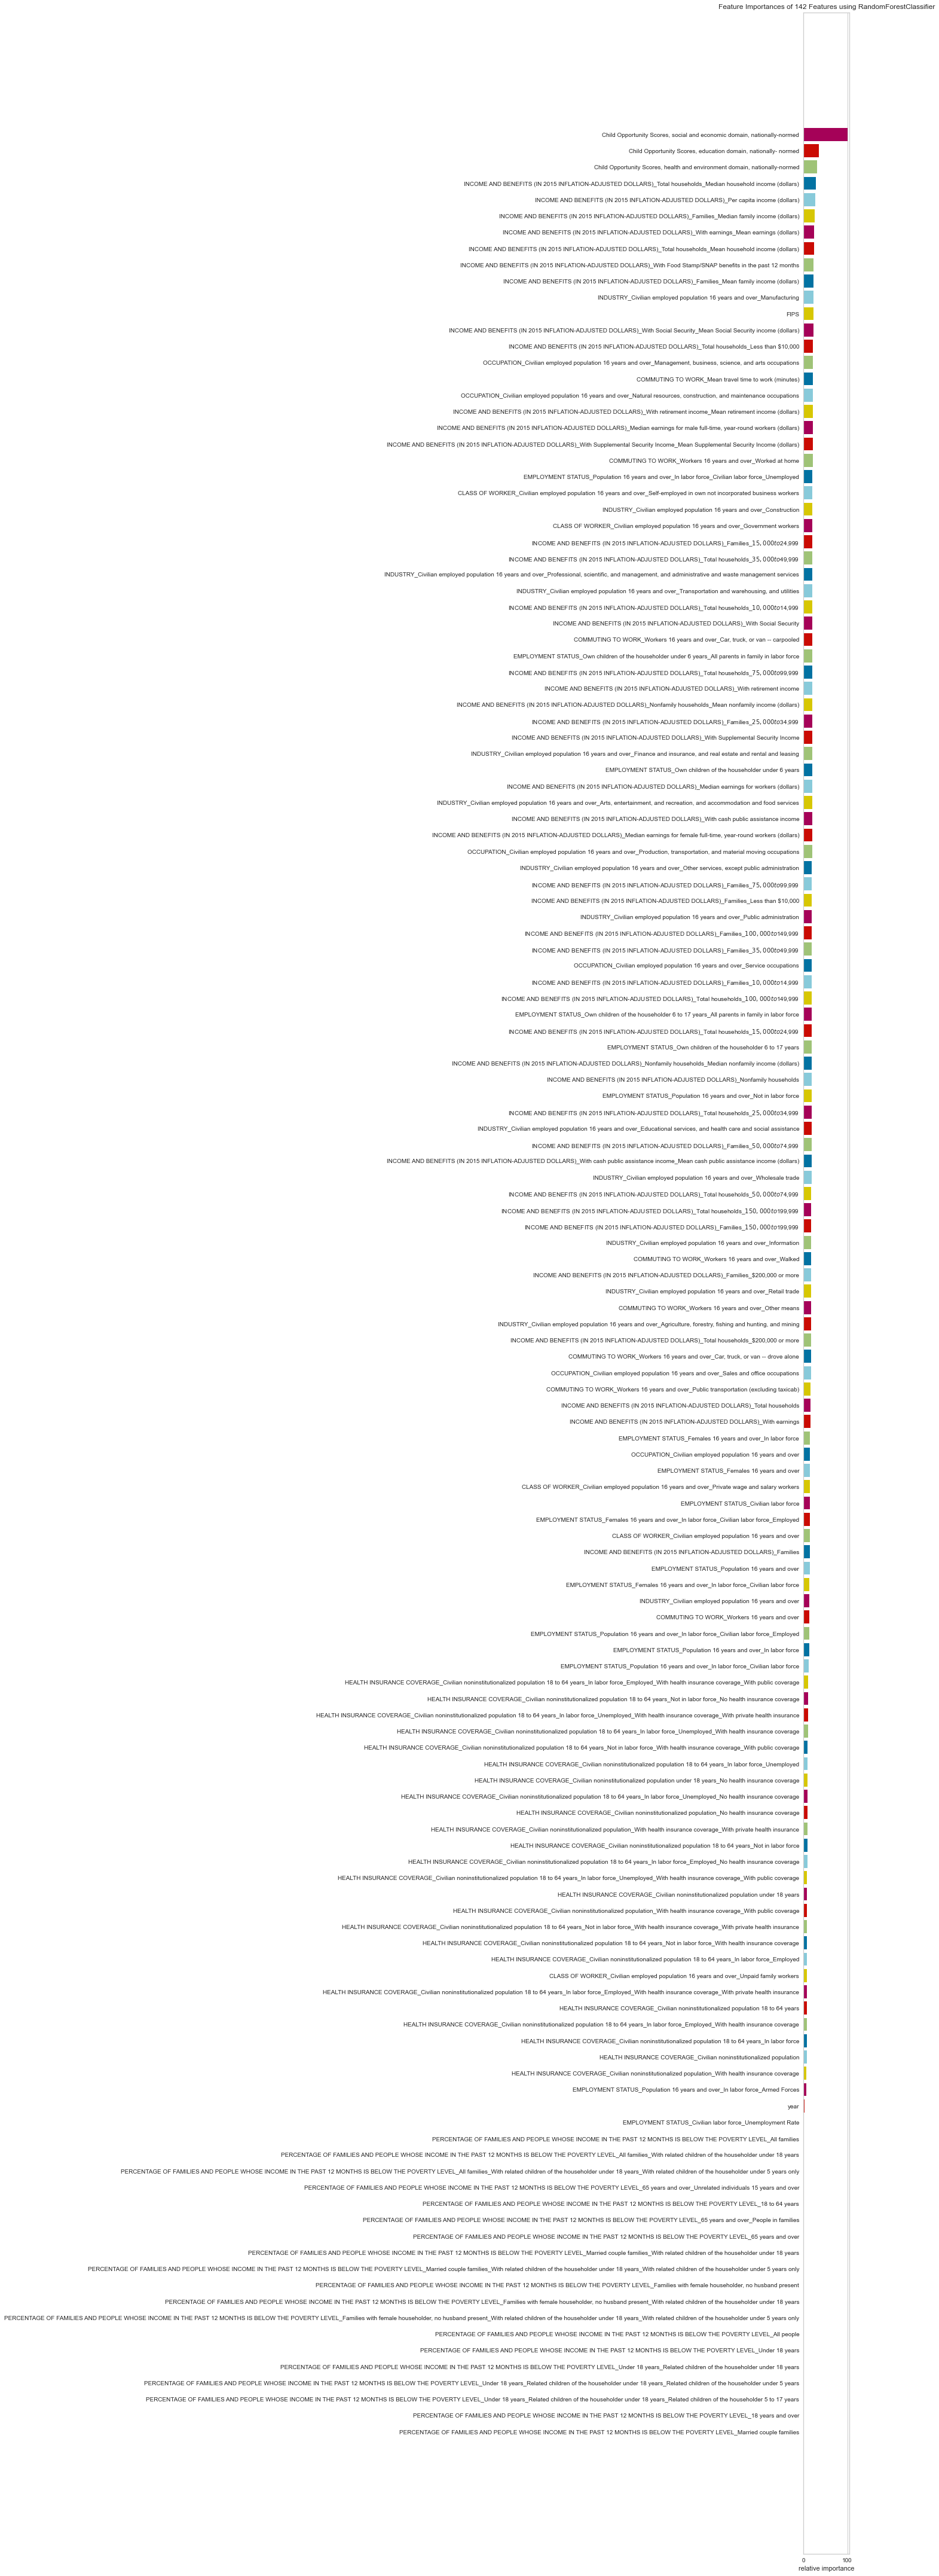

<AxesSubplot:title={'center':'Feature Importances of 142 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [30]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X = est.loc[:, est.columns != 'Child Opportunity Scores, overall COI, nationally-normed']
y = est['Child Opportunity Scores, overall COI, nationally-normed']

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

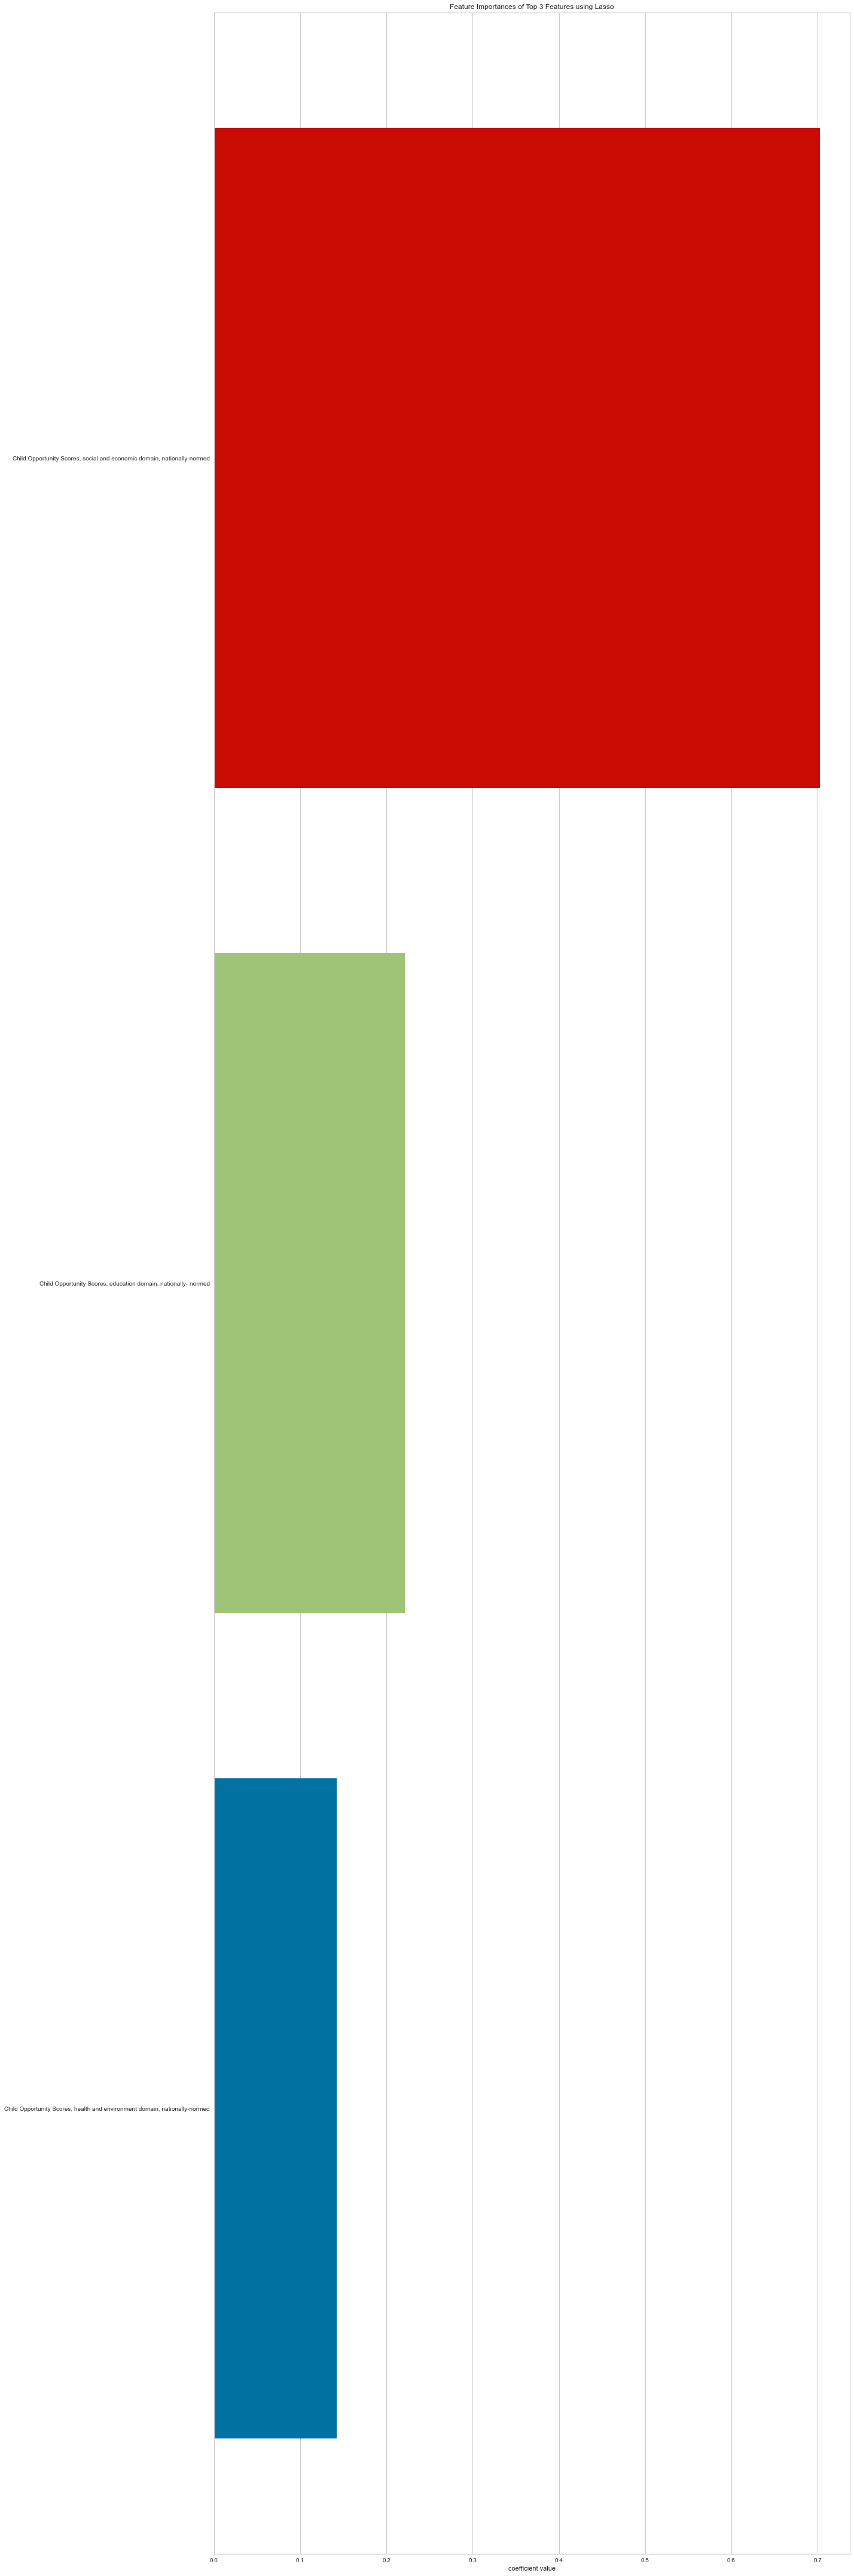

<AxesSubplot:title={'center':'Feature Importances of Top 3 Features using Lasso'}, xlabel='coefficient value'>

In [36]:
from sklearn.linear_model import Lasso
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset
X = est.loc[:, est.columns != 'Child Opportunity Scores, overall COI, nationally-normed']
y = est['Child Opportunity Scores, overall COI, nationally-normed']

# Title case the feature for better display and create the visualizer
viz = FeatureImportances(Lasso(), labels=num_labels, relative=False, topn=50)

# Fit and show the feature importances
viz.fit(X, y)
viz.show()

In [24]:
num_cols[-1]

'Child Opportunity Scores, overall COI, nationally-normed'

In [22]:
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Columns: 143 entries, EMPLOYMENT STATUS_Population 16 years and over to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(1), int64(142)
memory usage: 19.9 MB
